## Alexnet Architecture

![Alexnet](https://miro.medium.com/v2/resize:fit:1400/format:webp/0*pJ3o_2zTTNnixhKH.png)

## Importing libraries

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from PIL import Image as im
import pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
import keras
from keras import layers
from keras.models import Model
from keras.layers import Input, GlobalAveragePooling2D, concatenate, AveragePooling2D

In [2]:
import pickle

with open("C://Users//aksha//Downloads//archive//train.p", "rb") as f:
    train = pickle.load(f)
    
with open("C://Users//aksha//Downloads//archive//test.p", "rb") as f:
    test = pickle.load(f)
    
with open("C://Users//aksha//Downloads//archive//valid.p", "rb") as f:
    valid = pickle.load(f)
    
x_train, y_train = train['features'], train['labels']
x_test, y_test = test['features'], test['labels']
x_valid, y_valid = valid['features'], valid['labels']

# Convert class vec`tors to binary class matrices
num_classes = 43
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

In [3]:
x_train.shape, y_train.shape

((34799, 32, 32, 3), (34799, 43))

In [4]:
def create_alexnet(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [5]:
alexnext = create_alexnet(x_train.shape[1:], 43)
alexnext.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 2, 2, 256)         2

Epoch 1/15
1088/1088 [==============================] - 230s 210ms/step - loss: 1.1187 - accuracy: 0.6825 - val_loss: 0.7964 - val_accuracy: 0.7923
Epoch 2/15
1088/1088 [==============================] - 224s 206ms/step - loss: 0.3483 - accuracy: 0.9038 - val_loss: 0.3915 - val_accuracy: 0.9054
Epoch 3/15
1088/1088 [==============================] - 223s 205ms/step - loss: 0.2645 - accuracy: 0.9332 - val_loss: 0.6037 - val_accuracy: 0.8875
Epoch 4/15
1088/1088 [==============================] - 223s 205ms/step - loss: 0.2784 - accuracy: 0.9347 - val_loss: 0.4398 - val_accuracy: 0.9000
Epoch 5/15
1088/1088 [==============================] - 221s 203ms/step - loss: 0.2310 - accuracy: 0.9471 - val_loss: 0.7216 - val_accuracy: 0.8549
Epoch 6/15
1088/1088 [==============================] - 220s 203ms/step - loss: 0.2429 - accuracy: 0.9461 - val_loss: 0.4252 - val_accuracy: 0.9098
Epoch 7/15
1088/1088 [==============================] - 220s 203ms/step - loss: 0.2403 - accuracy: 0.9489 - val_

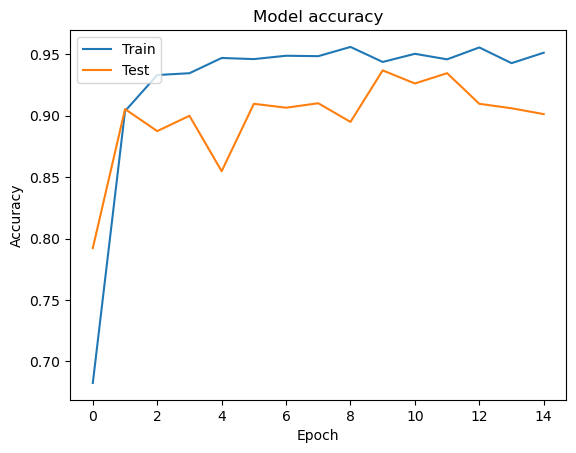

In [6]:
#Train the model
alexnext = create_alexnet(x_train.shape[1:], num_classes)
history = alexnext.fit(x_train, y_train, batch_size=32, epochs=15, validation_data=(x_valid, y_valid))

# Plot the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [7]:
scores = alexnext.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

395/395 [==============================] - 9s 22ms/step - loss: 1.1273 - accuracy: 0.8797
Test loss: 1.1272622346878052
Test accuracy: 0.8797308206558228


## Implementation using ResNet

In [8]:
def residual_block(input_tensor, filters, strides=(1, 1)):
    x = layers.Conv2D(filters, (3, 3), strides=strides, padding='same', use_bias=False)(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(filters, (3, 3), padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    shortcut = layers.Conv2D(filters, (1, 1), strides=strides, use_bias=False)(input_tensor)
    shortcut = layers.BatchNormalization()(shortcut)
    x = layers.add([x, shortcut])
    x = layers.Activation('relu')(x)
    return x

input_tensor = layers.Input(shape=(32,32,3))
x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', use_bias=False)(input_tensor)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

filters = [12, 32]
for f in filters:
    x = residual_block(x, f)

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(num_classes, activation='softmax')(x)

resnetModel = Model(input_tensor, x)
resnetModel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Epoch 1/15
1088/1088 [==============================] - 39s 33ms/step - loss: 2.1935 - accuracy: 0.3863 - val_loss: 2.4967 - val_accuracy: 0.2998
Epoch 2/15
1088/1088 [==============================] - 38s 35ms/step - loss: 1.0412 - accuracy: 0.6893 - val_loss: 2.2469 - val_accuracy: 0.4166
Epoch 3/15
1088/1088 [==============================] - 35s 32ms/step - loss: 0.5515 - accuracy: 0.8422 - val_loss: 1.0277 - val_accuracy: 0.6667
Epoch 4/15
1088/1088 [==============================] - 40s 37ms/step - loss: 0.3449 - accuracy: 0.9023 - val_loss: 1.0321 - val_accuracy: 0.6948
Epoch 5/15
1088/1088 [==============================] - 45s 42ms/step - loss: 0.2384 - accuracy: 0.9327 - val_loss: 0.7833 - val_accuracy: 0.7857
Epoch 6/15
1088/1088 [==============================] - 45s 42ms/step - loss: 0.1794 - accuracy: 0.9509 - val_loss: 0.6502 - val_accuracy: 0.8023
Epoch 7/15
1088/1088 [==============================] - 42s 38ms/step - loss: 0.1407 - accuracy: 0.9611 - val_loss: 0.6705 -

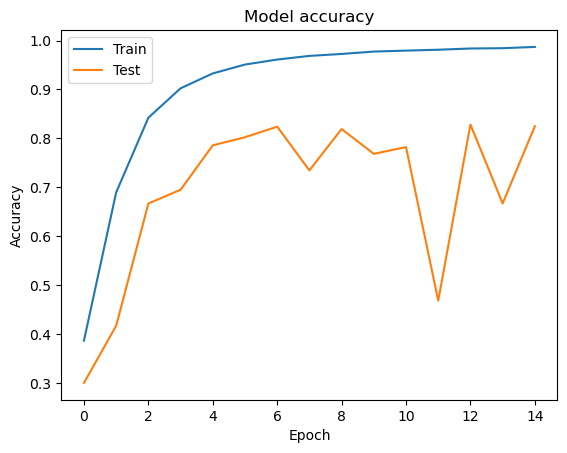

395/395 [==============================] - 4s 11ms/step - loss: 0.6426 - accuracy: 0.8411
Test loss: 0.6425864100456238
Test accuracy: 0.8410926461219788


In [9]:
history = resnetModel.fit(x_train, y_train, batch_size=32, epochs=15, validation_data=(x_valid, y_valid))

# Plot the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluation
scores = resnetModel.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

## Modified AlexNext

In [10]:
def modifiedalexnet(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [11]:
m_alex_net = modifiedalexnet(x_train.shape[1:], 43)
m_alex_net.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 4, 4, 512)         295424    
                                                                 
 conv2d_18 (Conv2D)          (None, 2, 2, 512)        

Epoch 1/15
1088/1088 [==============================] - 375s 343ms/step - loss: 1.0581 - accuracy: 0.7052 - val_loss: 0.5219 - val_accuracy: 0.8646
Epoch 2/15
1088/1088 [==============================] - 409s 376ms/step - loss: 0.3179 - accuracy: 0.9159 - val_loss: 0.3971 - val_accuracy: 0.9034
Epoch 3/15
1088/1088 [==============================] - 374s 344ms/step - loss: 0.2748 - accuracy: 0.9350 - val_loss: 0.7979 - val_accuracy: 0.8429
Epoch 4/15
1088/1088 [==============================] - 380s 349ms/step - loss: 0.2428 - accuracy: 0.9466 - val_loss: 0.4063 - val_accuracy: 0.8993
Epoch 5/15
1088/1088 [==============================] - 380s 349ms/step - loss: 0.2356 - accuracy: 0.9476 - val_loss: 0.2830 - val_accuracy: 0.9417
Epoch 6/15
1088/1088 [==============================] - 379s 349ms/step - loss: 0.2403 - accuracy: 0.9509 - val_loss: 0.4109 - val_accuracy: 0.9163
Epoch 7/15
1088/1088 [==============================] - 374s 344ms/step - loss: 0.2338 - accuracy: 0.9557 - val_

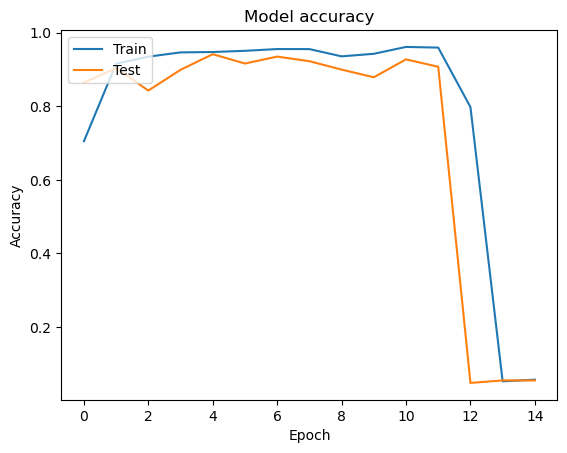

395/395 [==============================] - 11s 28ms/step - loss: 3.4663 - accuracy: 0.0570
Test loss: 3.466308832168579
Test accuracy: 0.05700712651014328


In [12]:
#Train the model
m_alex_net = modifiedalexnet(x_train.shape[1:], num_classes)
history = m_alex_net.fit(x_train, y_train, batch_size=32, epochs=15, validation_data=(x_valid, y_valid))

# Plot the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

scores = m_alex_net.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

## Arch 2

In [13]:
def create_arch2(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((4, 4)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((4, 4)))
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [14]:
arch2_model = create_arch2(x_train.shape[1:], 43)
arch2_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 5, 5, 64)          18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 1, 1, 64)         0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 4096)             

Epoch 1/15
1088/1088 [==============================] - 226s 206ms/step - loss: 2.8345 - accuracy: 0.2234 - val_loss: 2.0942 - val_accuracy: 0.3526
Epoch 2/15
1088/1088 [==============================] - 223s 205ms/step - loss: 1.4442 - accuracy: 0.5396 - val_loss: 1.3727 - val_accuracy: 0.6061
Epoch 3/15
1088/1088 [==============================] - 224s 205ms/step - loss: 0.9558 - accuracy: 0.6823 - val_loss: 1.0981 - val_accuracy: 0.6769
Epoch 4/15
1088/1088 [==============================] - 227s 209ms/step - loss: 0.8029 - accuracy: 0.7398 - val_loss: 1.2023 - val_accuracy: 0.6789
Epoch 5/15
1088/1088 [==============================] - 238s 219ms/step - loss: 0.7253 - accuracy: 0.7682 - val_loss: 1.0916 - val_accuracy: 0.7147
Epoch 6/15
1088/1088 [==============================] - 246s 226ms/step - loss: 0.6364 - accuracy: 0.8005 - val_loss: 0.9005 - val_accuracy: 0.7580
Epoch 7/15
1088/1088 [==============================] - 247s 227ms/step - loss: 0.6224 - accuracy: 0.8132 - val_

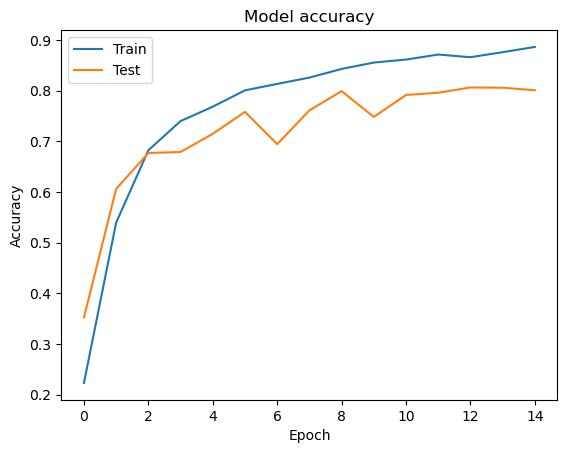

395/395 [==============================] - 5s 14ms/step - loss: 0.9264 - accuracy: 0.7865
Test loss: 0.9264220595359802
Test accuracy: 0.786460816860199


In [15]:
# Convert class vectors to binary class matrices
num_classes = 43

#Train the model
arch2_model = create_arch2(x_train.shape[1:], num_classes)
history = arch2_model.fit(x_train, y_train, batch_size=32, epochs=15, validation_data=(x_valid, y_valid))

# Plot the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluation
scores = arch2_model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

## Arch 3

In [16]:
def create_arch3(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(AveragePooling2D((3, 3)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(AveragePooling2D((2, 2)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(AveragePooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [17]:
arch3_model = create_arch3(x_train.shape[1:], 43)
arch3_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 average_pooling2d (AverageP  (None, 10, 10, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_28 (Conv2D)          (None, 8, 8, 512)         147968    
                                                                 
 average_pooling2d_1 (Averag  (None, 4, 4, 512)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_29 (Conv2D)          (None, 2, 2, 512)         2359808   
                                                                 
 average_pooling2d_2 (Averag  (None, 1, 1, 512)       

Epoch 1/15
1088/1088 [==============================] - 146s 132ms/step - loss: 1.2675 - accuracy: 0.6299 - val_loss: 0.6829 - val_accuracy: 0.8066
Epoch 2/15
1088/1088 [==============================] - 144s 133ms/step - loss: 0.1965 - accuracy: 0.9411 - val_loss: 0.3734 - val_accuracy: 0.9007
Epoch 3/15
1088/1088 [==============================] - 151s 138ms/step - loss: 0.1344 - accuracy: 0.9629 - val_loss: 0.4171 - val_accuracy: 0.8964
Epoch 4/15
1088/1088 [==============================] - 148s 136ms/step - loss: 0.1082 - accuracy: 0.9699 - val_loss: 0.2970 - val_accuracy: 0.9290
Epoch 5/15
1088/1088 [==============================] - 146s 134ms/step - loss: 0.0823 - accuracy: 0.9765 - val_loss: 0.5131 - val_accuracy: 0.9315
Epoch 6/15
1088/1088 [==============================] - 144s 133ms/step - loss: 0.0827 - accuracy: 0.9777 - val_loss: 0.4445 - val_accuracy: 0.9274
Epoch 7/15
1088/1088 [==============================] - 141s 130ms/step - loss: 0.0775 - accuracy: 0.9804 - val_

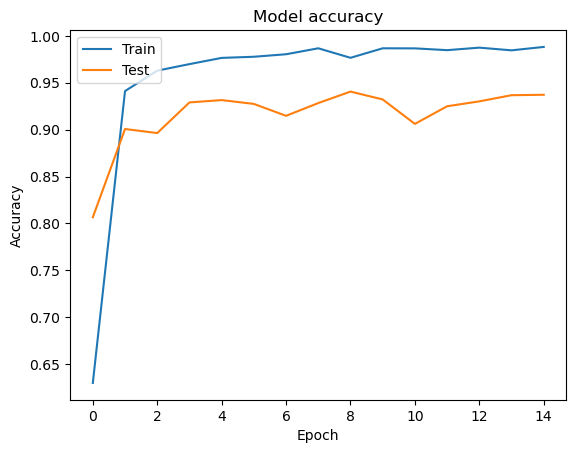

395/395 [==============================] - 8s 21ms/step - loss: 0.4924 - accuracy: 0.9284
Test loss: 0.4924391806125641
Test accuracy: 0.9284243583679199


In [18]:
# Convert class vectors to binary class matrices
num_classes = 43

#Train the model
arch3_model = create_arch3(x_train.shape[1:], num_classes)
history = arch3_model.fit(x_train, y_train, batch_size=32, epochs=15, validation_data=(x_valid, y_valid))

# Plot the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluation
scores = arch3_model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

In [36]:
def test_all_models(test_data, label_data):
    # Testing for alex net
    print("############### Alex net ###################")
    scores = alexnext.evaluate(test_data, label_data, verbose=1)
    print('Test loss:', scores[0])
    print('Test accuracy:', scores[1])
    
    # Testing for resnet
    print("############### Res net ###################")
    scores = resnetModel.evaluate(test_data, label_data, verbose=1)
    print('Test loss:', scores[0])
    print('Test accuracy:', scores[1])
    
    # Testing for modified alex net
    print("############### Modified Alex net ###################")
    scores = m_alex_net.evaluate(test_data, label_data, verbose=1)
    print('Test loss:', scores[0])
    print('Test accuracy:', scores[1])
    
    # Arch 2
    print("############### Arch 2 ###################")
    scores = arch2_model.evaluate(test_data, label_data, verbose=1)
    print('Test loss:', scores[0])
    print('Test accuracy:', scores[1])
    
    # Arch 3
    print("############### Arch 3 net ###################")
    scores = arch3_model.evaluate(test_data, label_data, verbose=1)
    print('Test loss:', scores[0])
    print('Test accuracy:', scores[1])

## Dataset 2

In [33]:
import os
import numpy as np
from PIL import Image

# Define the path to the images directory
path = 'C:\\Users\\aksha\\Downloads\\Dataset\\Dataset 2\\Train'

# Create a dictionary to store the images and their labels
images = []
labels = []

# Iterate through all the subdirectories in the images directory
for folder_name in os.listdir(path):
    folder_path = os.path.join(path, folder_name)
    if os.path.isdir(folder_path):
        # Iterate through all the images in the subdirectory
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)
            # Load the image using PIL
            image = Image.open(image_path)
            # Resize the image to a fixed size
            image = image.resize((32, 32))
            # Convert the image to a numpy array
            image = np.array(image)
            # Add the image and its label to the list
            images.append(image)
            labels.append(folder_name)

# Convert the lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Convert class vec`tors to binary class matrices
num_classes = 43
labels = keras.utils.to_categorical(labels, num_classes)

In [34]:
len(images), labels.shape

(39209, (39209, 43))

In [37]:
test_all_models(images, labels)

############### Alex net ###################
1226/1226 [==============================] - 29s 23ms/step - loss: 0.2805 - accuracy: 0.9511
Test loss: 0.280472993850708
Test accuracy: 0.951133668422699
############### Res net ###################
1226/1226 [==============================] - 310s 253ms/step - loss: 0.2618 - accuracy: 0.9203
Test loss: 0.2618231475353241
Test accuracy: 0.920324444770813
############### Modified Alex net ###################
1226/1226 [==============================] - 36s 29ms/step - loss: 3.4871 - accuracy: 0.0566
Test loss: 3.48710560798645
Test accuracy: 0.05661965534090996
############### Arch 2 ###################
1226/1226 [==============================] - 24s 19ms/step - loss: 0.4682 - accuracy: 0.8788
Test loss: 0.46820399165153503
Test accuracy: 0.8788033127784729
############### Arch 3 net ###################
1226/1226 [==============================] - 23s 18ms/step - loss: 0.0641 - accuracy: 0.9908
Test loss: 0.06414669007062912
Test accuracy: 0

## Dataset 3

In [38]:
import os
import numpy as np
from PIL import Image

# Define the path to the images directory
path = 'C:\\Users\\aksha\\Downloads\\Dataset\\Dataset_4\\Train'

# Create a dictionary to store the images and their labels
images = []
labels = []

# Iterate through all the subdirectories in the images directory
for folder_name in os.listdir(path):
    folder_path = os.path.join(path, folder_name)
    if os.path.isdir(folder_path):
        # Iterate through all the images in the subdirectory
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)
            # Load the image using PIL
            image = Image.open(image_path)
            # Resize the image to a fixed size
            image = image.resize((32, 32))
            # Convert the image to a numpy array
            image = np.array(image)
            # Add the image and its label to the list
            images.append(image)
            labels.append(folder_name)

# Convert the lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Convert class vec`tors to binary class matrices
num_classes = 43
labels = keras.utils.to_categorical(labels, num_classes)


In [40]:
test_all_models(images, labels)

############### Alex net ###################
1103/1103 [==============================] - 26s 23ms/step - loss: 0.2832 - accuracy: 0.9511
Test loss: 0.28315165638923645
Test accuracy: 0.9511448740959167
############### Res net ###################
1103/1103 [==============================] - 12s 11ms/step - loss: 0.2611 - accuracy: 0.9208
Test loss: 0.26111143827438354
Test accuracy: 0.9207946062088013
############### Modified Alex net ###################
1103/1103 [==============================] - 32s 29ms/step - loss: 3.4871 - accuracy: 0.0566
Test loss: 3.4871068000793457
Test accuracy: 0.05661981552839279
############### Arch 2 ###################
1103/1103 [==============================] - 21s 19ms/step - loss: 0.4680 - accuracy: 0.8790
Test loss: 0.46797943115234375
Test accuracy: 0.8789957165718079
############### Arch 3 net ###################
1103/1103 [==============================] - 21s 19ms/step - loss: 0.0655 - accuracy: 0.9906
Test loss: 0.06550285965204239
Test accura

In [39]:
images.shape

(35288, 32, 32, 3)

## Dataset 4

In [41]:
import os
import numpy as np
from PIL import Image

# Define the path to the images directory
path = 'C:\\Users\\aksha\\Downloads\\Dataset\\Dataset_3\\Train'

# Create a dictionary to store the images and their labels
images = []
labels = []

# Iterate through all the subdirectories in the images directory
for folder_name in os.listdir(path):
    folder_path = os.path.join(path, folder_name)
    if os.path.isdir(folder_path):
        # Iterate through all the images in the subdirectory
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)
            # Load the image using PIL
            image = Image.open(image_path)
            # Resize the image to a fixed size
            image = image.resize((32, 32))
            # Convert the image to a numpy array
            image = np.array(image)
            # Add the image and its label to the list
            images.append(image)
            labels.append(folder_name)

# Convert the lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Convert class vec`tors to binary class matrices
num_classes = 43
labels = keras.utils.to_categorical(labels, num_classes)


In [42]:
test_all_models(images, labels)

############### Alex net ###################
1226/1226 [==============================] - 29s 23ms/step - loss: 0.2805 - accuracy: 0.9511
Test loss: 0.280472993850708
Test accuracy: 0.951133668422699
############### Res net ###################
1226/1226 [==============================] - 13s 10ms/step - loss: 0.2618 - accuracy: 0.9203
Test loss: 0.2618231475353241
Test accuracy: 0.920324444770813
############### Modified Alex net ###################
1226/1226 [==============================] - 36s 30ms/step - loss: 3.4871 - accuracy: 0.0566
Test loss: 3.48710560798645
Test accuracy: 0.05661965534090996
############### Arch 2 ###################
1226/1226 [==============================] - 24s 19ms/step - loss: 0.4682 - accuracy: 0.8788
Test loss: 0.46820399165153503
Test accuracy: 0.8788033127784729
############### Arch 3 net ###################
1226/1226 [==============================] - 23s 19ms/step - loss: 0.0641 - accuracy: 0.9908
Test loss: 0.06414669007062912
Test accuracy: 0.9

In [43]:
images.shape

(39209, 32, 32, 3)

## Testing with custom data

In [26]:
import os
import numpy as np
from PIL import Image

# Define the path to the images directory
path = 'C:\\Users\\aksha\\Desktop\\test-images'

# Create a dictionary to store the images and their labels
images = []
labels = []

# Iterate through all the images in the subdirectory
for image_name in os.listdir(path):
    image_path = os.path.join(path, image_name)
    # Load the image using PIL
    image = Image.open(image_path)
    # Resize the image to a fixed size
    image = image.resize((32, 32))
    # Convert the image to a numpy array
    image = np.array(image)
    # Add the image and its label to the list
    images.append(image)
    labels.append(image_name)

# Convert the lists to numpy arrays
images = np.array(images)

# for image in images:
predictions = arch3_model.predict(images)
for i, prediction in enumerate(predictions):
    idx = np.argmax(prediction)
    print(idx, labels[i])

# print('Test loss:', scores[0])
# print('Test accuracy:', scores[1])

1/1 [==============================] - 0s 415ms/step
12 1.jpg
14 10.jpg
23 2.jpg
41 3.jpg
16 4.jpg
2 5.jpg
34 6.jpg
15 7.jpg
12 8.jpg
40 9.jpg


In [27]:
images.shape

(10, 32, 32, 3)